In [15]:
import numpy as np
import math
import pandas as pd
import itertools
import string

In [217]:
M1 = np.array([[0,8,7,12], [8,0,9,14], [7,9,0,11], [12,14,11,0]])
M2 = np.array([[0,2,3,8,14,18],[2,0,3,8,14,18],
      [3,3,0,8,14,18],[8,8,8,0,14,18],
      [14,14,14,14,0,18],[18,18,18,18,18,0]])
#UPGMA
M3 = np.array([[0,19,27,8,33,18,13],[19,0,31,18,36,1,13],
          [27,31,0,26,41,32,29],[8,18,26,0,31,17,14],
          [33,36,41,31,0,35,28],[18,1,32,17,35,0,12],
          [13,13,29,14,28,12,0]])
#Neighbor Joining
M4 = np.array([[0,2,4,6,6,8],[2,0,4,6,6,8],
          [4,4,0,6,6,8],[6,6,6,0,4,8],
          [6,6,6,4,0,8],[8,8,8,8,8,0]])

# Distance matrices. For example M1[0] shows all the distances from point A to point A,B,C and D.
# UPGMA produces an ultrametric tree and neighbor joining produces an additive tree

#Matrice de test vue sur Youtube
M5 = np.array([[0,9,2,4,9,10],[9,0,9,6,2,10],
               [2,9,0,5,9,10],[4,6,5,0,6,10],
               [9,2,9,6,0,10],[10,10,10,10,10,0]])

#Matrice TD2
M6 = np.array([[0.,19.,27.,8.,33.,18.,13.],[19.,0.,31.,18.,36.,1.,13.],
             [27.,31.,0.,26.,41.,32.,29.],[8.,18.,26.,0.,31.,17.,14.],
             [33.,36.,41.,31.,0.,35.,28.],[18.,1.,32.,17.,35.,0.,12.],
             [13.,13.,29.,14.,28.,12.,0.]])

In [98]:
# Question 1 Introduction
# 1.1

def additive_check(matrix):
    
    additive_bool = True # boolean that returns true if matrix is additive
    
    for each in itertools.permutations(range(len(matrix)),4):
        if not matrix[each[0],each[1]] + matrix[each[2],each[3]] <= max( (matrix[each[0],each[2]] + matrix[each[1],each[3]]), (matrix[each[0],each[3]]+ matrix[each[1],each[2]]) ):
            additive_bool = False
            
    return additive_bool

In [88]:
additive_check(M1)

True

In [89]:
additive_check(M2)

True

In [92]:
additive_check(M3)

False

In [87]:
additive_check(M4)

True

In [93]:
# Question 1 Introduction
# 1.1

def ultrametric_check(matrix):
    
    ultrametric_bool = True # boolean that returns true if matrix is ultrametric
    
    for each in itertools.permutations(range(len(matrix)),3):
        if not matrix[each[0],each[2]] <= max( matrix[each[0],each[1]] , matrix[each[1],each[2]] ):
            ultrametric_bool = False
            
    return ultrametric_bool

In [94]:
ultrametric_check(M1)

False

In [95]:
ultrametric_check(M2)

True

In [96]:
ultrametric_check(M3)

False

In [97]:
ultrametric_check(M4)

True

In [113]:
# Question 1 Introduction
# 1.2

def cluster_distance(matrix, cluster_one):
    return sum(matrix[cluster_one])

def cluster_distance_all(matrix):
    return [cluster_distance(matrix,n) for n in range(len(matrix))]

In [116]:
cluster_distance(M1,0)

27

In [115]:
cluster_distance_all(M1)

[27, 31, 27, 37]

# Question 2: UPGMA

2.1 The Newick format is a way of representing trees using parentheses and commas. 
For example the same tree can be represented in all the following ways:

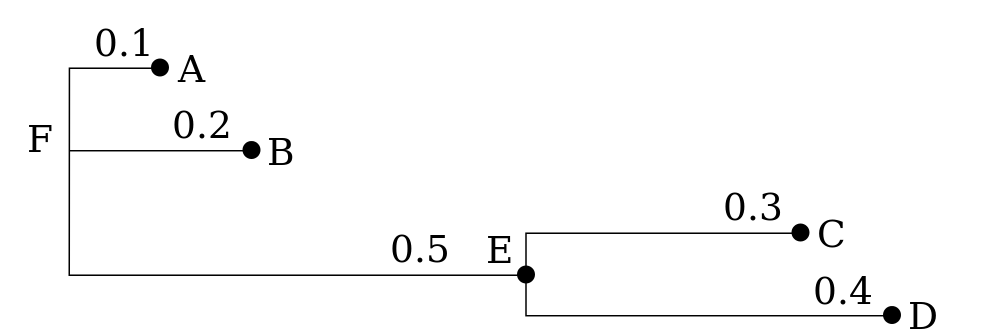

(,,(,));                               no nodes are named

(A,B,(C,D));                           leaf nodes are named

(A,B,(C,D)E)F;                         all nodes are named

(:0.1,:0.2,(:0.3,:0.4):0.5);           all but root node have a distance to parent

(:0.1,:0.2,(:0.3,:0.4):0.5):0.0;       all have a distance to parent

(A:0.1,B:0.2,(C:0.3,D:0.4):0.5);       distances and leaf names (popular)

(A:0.1,B:0.2,(C:0.3,D:0.4)E:0.5)F;     distances and all names

((B:0.2,(C:0.3,D:0.4)E:0.5)A:0.1)F;    a tree rooted on a leaf node (rare)

In [239]:
# For UPGMA, we don't have to look at every element. If we have n different elements, then:
# We look at no element from the first line, we look at the first element from the second line, we look at the first and second elements from the third line, etc
# Generalization: if on line n, look at the n-1 elements

def UPGMA(input_matrix):
    
    matrix = input_matrix.astype(float)
    
    # Three lists required; two for Newick, one for counting mergeable elements
    newick_complete = []
    newick_inc = []
    
    branches = len(matrix)
    new_matrix = np.zeros((len(matrix),len(matrix)))

    score_dictionary = {}
    
    # Create a dictionary for all corresponding branch index values: index 0 = first element so we name it "A"
    leaf_dict2 = dict() 
    for index, letter in enumerate(string.ascii_uppercase):
       leaf_dict2[index] = letter
    # For example: leaf_dict2[0] will give the character A
    
    newick_dict = np.zeros(len(matrix))
    newick_dict = newick_dict.tolist()
    for n in range(len(matrix)):
        newick_dict[n] = leaf_dict2[n]
        
    first_loop = True
    while(len(matrix) > 1): # continue building the tree until we only have two branches left (change 3 to 2 after first loop works)
        check_min = []
    
        # Part of the function to check for minimal distance. Run until we only have two rows left?
        for n in range (1, len(matrix)): # ignore the first row
            for m in range(n): # for first row, get 0 elements, for second row, get 1 element, for third row, get 2 elements...
                check_min.append(matrix[n][m])
                min_value = min(check_min)
                min_args = np.where(matrix == min_value) # for M1, should return [0,2] and [2,0] which are the same distance
        
        first_combine = min_args[0][0] # First element to combine, for example 0 ==> A
        first_letter = newick_dict[first_combine]
        second_combine = min_args[0][1] # Second element to combine, for example 2 ==> C; ignore min_args[1][...] since it's the same
        second_letter = newick_dict[second_combine]
        
        score_dictionary[first_letter+second_letter] = min_value # stores AC as 7 in first loop, then ACB as 4.25 in second loop, etc
        
        if(first_loop):
            newick_inc = first_letter
           
        newick_inc = '(' + newick_inc + ',' + second_letter + ')' # add to the simplified version of Newick
        
        print(score_dictionary)
        print(newick_inc)
        
        # Tree update: equidistance
        tree_update = min_value/2 # assign this value to the branch length of the two concerned branches
        newick_complete = []
        # TO FINISH ONCE THE SIMPLIFIED VERSION WORKS
        
        # Distance update:       
        for a in range(len(matrix)):
            for b in range(len(matrix)):
                if a != first_combine and a != second_combine:
                    if b == first_combine or b == second_combine:
                        new_matrix[a][b] = matrix[a][b] # fetch all the required values for new distances after merging
        # print(new_matrix)
        
        # new_matrix now holds all the required values to calculate the new distances, which are put back into original matrix
        for c in range(len(new_matrix)):
            if (sum(new_matrix[c]) != 0): # if we are on a line that's not part of the first or second element to combine
                matrix[c][first_combine] = ( len(newick_dict[first_combine])*new_matrix[c][first_combine] + len(newick_dict[second_combine])*new_matrix[c][second_combine] ) /( len(newick_dict[first_combine])+len(newick_dict[second_combine]) )
                matrix[first_combine][c] = ( len(newick_dict[first_combine])*new_matrix[c][first_combine] + len(newick_dict[second_combine])*new_matrix[c][second_combine] ) /( len(newick_dict[first_combine])+len(newick_dict[second_combine]) )
                   
        # Nuke the row and column of the second element combined
        matrix = np.delete(matrix, (second_combine), axis=0)
        matrix = np.delete(matrix, (second_combine), axis=1)
        # print(matrix)
        
        new_matrix = np.zeros((len(new_matrix)-1,len(new_matrix)-1))   # reduced by one dimension
        newick_dict[first_combine] += newick_dict.pop(second_combine)  # reduce the dictionnary size by 1
        print(newick_dict)

        first_loop = False
        print('\n')
    return newick_inc,newick_complete

# The Newick format return value for M1 should be (distances and leaf names)
# Assuming we give 0=>A, 1=>B, 2=>C, and 3=>D 
# (((A:3.5,C:3.5):0.75,B:4.25):1.9,D:6.15)
# Simplified version:
# (((A,C),B),D)

In [241]:
a,b = UPGMA(M1)
print(a)
print(b)

{'AC': 7.0}
(A,C)
['AC', 'B', 'D']


{'AC': 7.0, 'ACB': 8.5}
((A,C),B)
['ACB', 'D']


{'AC': 7.0, 'ACB': 8.5, 'ACBD': 12.333333333333334}
(((A,C),B),D)
['ACBD']


(((A,C),B),D)
[]


In [234]:
UPGMA(M3)

{'BF': 1.0}
(B,F)
['A', 'BF', 'C', 'D', 'E', 'G']


{'BF': 1.0, 'AD': 8.0}
(B,F)
['AD', 'BF', 'C', 'E', 'G']


{'BF': 1.0, 'AD': 8.0, 'BFG': 12.5}
(B,F)
['AD', 'BFG', 'C', 'E']


{'BF': 1.0, 'AD': 8.0, 'BFG': 12.5, 'ADBFG': 16.5}
(B,F)
['ADBFG', 'C', 'E']


{'BF': 1.0, 'AD': 8.0, 'BFG': 12.5, 'ADBFG': 16.5, 'ADBFGC': 29.0}
(B,F)
['ADBFGC', 'E']


{'BF': 1.0, 'AD': 8.0, 'BFG': 12.5, 'ADBFG': 16.5, 'ADBFGC': 29.0, 'ADBFGCE': 34.0}
(B,F)
['ADBFGCE']




[]

In [36]:
M1 = np.array([[0,8,7,12], [8,0,9,14], [7,9,0,11], [12,14,11,0]])
check_min = []

for n in range (1, len(M1)): # ignore the first row
    for m in range(n):
        check_min.append(M1[n][m])
        min_value = min(check_min)
        min_args = np.where(M1 == min_value) # for M1, should return [0,2] and [2,0] which are the same distance
        
print(check_min)
print(min_value)
print(min_args)
print(min_args[0])
print(min_args[0][1])

[8, 7, 9, 12, 14, 11]
7
(array([0, 2], dtype=int64), array([2, 0], dtype=int64))
[0 2]
2


In [41]:
matrix = np.array([[0,8,7,12], [8,0,9,14], [7,9,0,11], [12,14,11,0]])
M2 = np.array([[0,19,27,8,33,18,13],[19,0,31,18,36,1,13],[27,31,0,26,41,32,29],[8,18,26,0,31,17,14],[33,36,41,31,0,35,28],[18,1,32,17,35,0,12],[13,13,29,14,28,12,0]])
M3 = np.array([[0,8,0,12], [0,0,0,0], [0,9,0,11], [0,0,0,0]])

new_M2 = np.zeros((len(M2),len(M2)))

for a in range(len(M2)):
    for b in range(len(M2)):
        if a != 1 and a != 5:
            if b == 1 or b == 5:
                new_M2[a][b] = M2[a][b]         

print(new_M2)
print(sum(new_M2[0]))

[[ 0. 19.  0.  0.  0. 18.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0. 31.  0.  0.  0. 32.  0.]
 [ 0. 18.  0.  0.  0. 17.  0.]
 [ 0. 36.  0.  0.  0. 35.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0. 13.  0.  0.  0. 12.  0.]]
37.0


In [10]:
split_list = string_cond.split(',')

for i in split_list:
    print(i)

split_list[0] += split_list.pop(1)

for i in split_list:
    print(i)

AC
B
ACB


In [49]:
matrix = np.array([[0,8,7,12], [8,0,9,14], [7,9,0,11], [12,14,11,0]])
leaf_dict2 = dict() 
for index, letter in enumerate(string.ascii_uppercase):
    leaf_dict2[index] = letter

newick = np.zeros(len(matrix))
newick = newick.tolist()

for n in range(len(matrix)):
    newick[n] = leaf_dict2[n]
print(newick)

newick[0] += newick.pop(2)
print(newick)

newick[0] += newick.pop(1)
print(newick)

['A', 'B', 'C', 'D']
['AC', 'B', 'D']
['ACB', 'D']


In [79]:
d = {}
print(d)
# {'key': 'value'}
d['mynewkey'] = 'mynewvalue'
print(d)
# {'key': 'value', 'mynewkey': 'mynewvalue'}

d[leaf_dict2[0]+leaf_dict2[2]] = 5
print(d)

{}
{'mynewkey': 'mynewvalue'}
{'mynewkey': 'mynewvalue', 'AC': 5}
